In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [21]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [22]:
df=pd.read_csv("/Users/koour/Downloads/fmnist_small.csv")
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


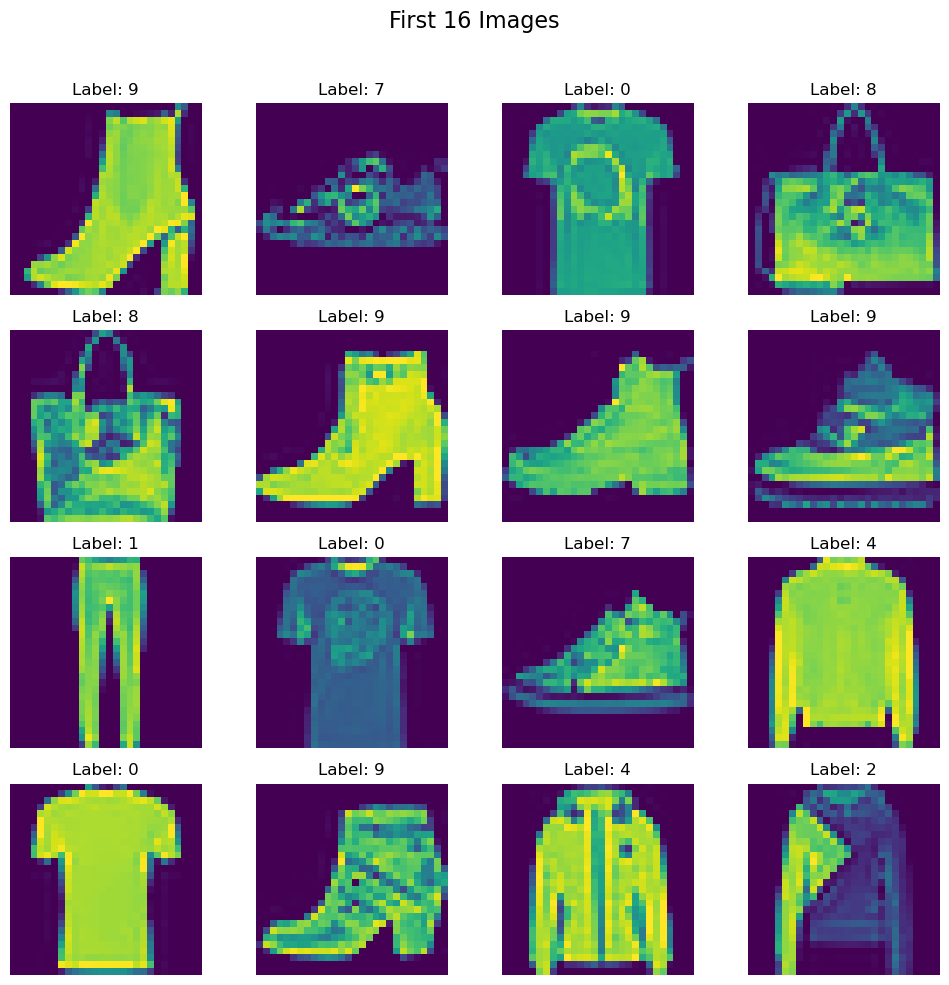

In [23]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [24]:
# train test split
x=df.iloc[:,1:].values # x has features
y=df.iloc[:,0].values # y has lables

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# scaling the feautures
X_train = X_train/255.0
X_test = X_test/255.0

In [27]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [28]:
# create Dataset class
class CustomDataset(Dataset):
    
    def __init__(self,features,lables):
        
        self.features=torch.tensor(features, dtype=torch.float32) # converting into tensors here itself
        self.lables=torch.tensor(lables, dtype=torch.long) 

    def __len__(self):

        return self.features.shape[0]


    def __getitem__(self,index):

        return self.features[index],self.lables[index]

In [29]:
# create train and test dataset obj
train_dataset=CustomDataset(X_train,y_train)
test_dataset=CustomDataset(X_test,y_test)

In [30]:
len(train_dataset)

4800

In [33]:
train_dataset[10] # gives data of 10 row

In [32]:
# create dataloader
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [39]:
# define NN class
class MyNN(nn.Module):

    def __init__(self,num_features):

        super().__init__()
        self.model=nn.Sequential(
            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )


    def forward(self,x):
        return self.model(x)
    
    

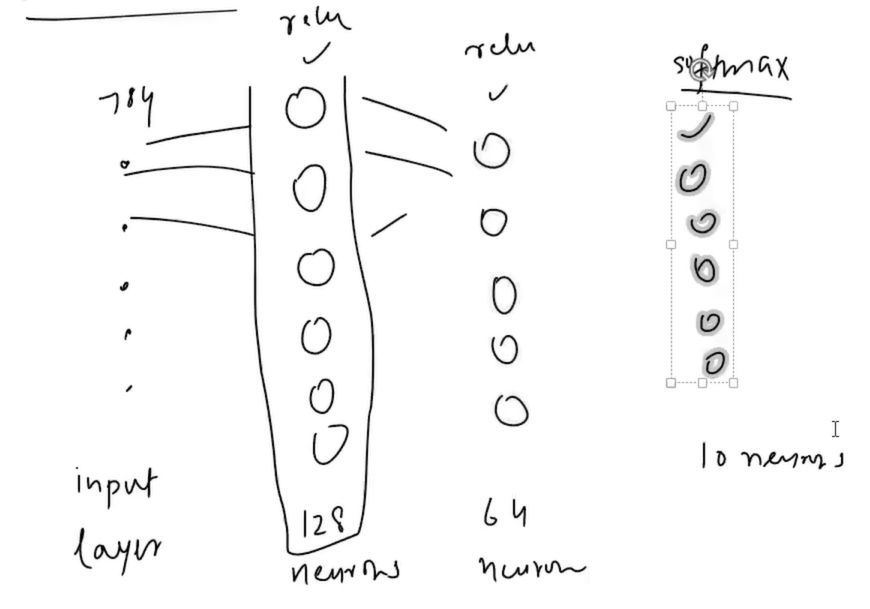

In [40]:
# set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [41]:
# intiate the model
model=MyNN(X_train.shape[1])

#loss fun
loss=nn.CrossEntropyLoss()

# optimizer
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [43]:
len(train_dataloader)

150

In [ ]:
# training loop

for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features,batch_lables in train_dataloader:
        #forward pass
        outputs=model(batch_features)
        
        # cal loss

        total_loss=loss(outputs,batch_lables)

        # backward pass

        optimizer.zero_grad()
        total_loss.backward()

        #update grads

        optimizer.step()

        total_epoch_loss = total_epoch_loss + total_loss.item()
    avg_loss = total_epoch_loss/len(train_dataloader)
    print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.00030351947717766357
Epoch: 2 , Loss: 0.00029984633537727255
Epoch: 3 , Loss: 0.00029846179323309724
Epoch: 4 , Loss: 0.000295210740659968
Epoch: 5 , Loss: 0.0002935196499432398
Epoch: 6 , Loss: 0.0002926130631143072
Epoch: 7 , Loss: 0.00028809599139397807
Epoch: 8 , Loss: 0.00028465234562948655
Epoch: 9 , Loss: 0.0002842472326786568
Epoch: 10 , Loss: 0.0002826441152986566
Epoch: 11 , Loss: 0.00028025206435510576
Epoch: 12 , Loss: 0.00027552891112767004
Epoch: 13 , Loss: 0.0002752140277637712
Epoch: 14 , Loss: 0.0002727610078485062
Epoch: 15 , Loss: 0.0002713639762077946
Epoch: 16 , Loss: 0.0002681214403128251
Epoch: 17 , Loss: 0.0002665483894694868
Epoch: 18 , Loss: 0.0002647326814500654
Epoch: 19 , Loss: 0.00026155526458751413
Epoch: 20 , Loss: 0.00026189393177143455
Epoch: 21 , Loss: 0.0002586377832873647
Epoch: 22 , Loss: 0.0002559409553941805
Epoch: 23 , Loss: 0.00025491776907680713
Epoch: 24 , Loss: 0.00025319209693407173
Epoch: 25 , Loss: 0.0002510828661130896

In [58]:
# set model to eval mode
model.eval()  # tells model that it is used for evaluation so that it behaves differently

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [60]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_dataloader:

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1) # taking the max probability so that it belongs to that class 

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item() # if predicted and b

print(correct/total)

0.8375


In [ ]:
# the outputs which we got will be of size (32,10) bcs each batch is of size 32 and we have 10 classes ,it contains probability of those classes 
# the max val is consider as the classification and img belongs to that class